# Report

Grupo 1:
- Felipe Sagasti - 103730
- Marcos Bianchi - 108921

## Objetivo
El desarrollo del trabajo práctico tiene como objetivo la implementación, prueba y comparación de los distintos métodos para hallar raíces que vimos en clase. Estos métodos son Bisección, Punto Fijo, Newton-Raphson, Newton-Raphson modificado y Secante.

## Cuerpo
El desarrollo del trabajo práctico también implicó la busqueda de casos de falla particulares para cada uno de los métodos, para demostrar los puntos debiles de cada uno.

También es parte del trabajo utilizar una función a elección donde todos los métodos son exitosos y compararlos por ciertas métricas:
- Orden de Convergencia
- Constante Asintótica
- Cota de error logarítmica

Al realizar esta comparación se espera observar de forma práctica lo visto de forma teórica en clase, siendo esto la performance de los métodos y cuales son mejores que otros en un cierto caso.

In [1]:
from bisection import bisection
from fixed_point import fixed_point
from newton_raphson import newton_raphson
from newton_raphson_modified import newton_raphson_modified
from secant import secant

In [2]:
from math import log, log10


def windows(arr, window_size):
    for i in range(len(arr) - window_size + 1):
        yield tuple(arr[i:i + window_size])


def order_of_convergence(x3, x2, x1, x0):
    num = log(abs((x0 - x1) / (x1 - x2)))
    den = log(abs((x1 - x2) / (x2 - x3)))
    return num / den


def ocs(table):
    return [
        order_of_convergence(x3[0], x2[0], x1[0], x0[0])
        for x3, x2, x1, x0 in windows(table, 4)
    ]


def asymptotic_constant(x3, x2, x1, x0):
    num = abs(x1 - x0)
    den = abs(x2 - x1) ** order_of_convergence(x3, x2, x1, x0)
    return num / den


def acs(table):
    return [
        asymptotic_constant(x3[0], x2[0], x1[0], x0[0])
        for x3, x2, x1, x0 in windows(table, 4)
    ]


def error(table):
    return [
        log10(abs(x0[0] - x1[0]))
        for x1, x0 in windows(table, 2)
    ]


In [3]:
from math import sin, cos

f   = lambda x: 0.2 * (x - 1) ** 2 + sin(x - 1)
df  = lambda x: 0.2 * (5 * cos(x - 1) + 2 * x - 2)
d2f = lambda x: 0.2 * (-5 * sin(x - 1) + 2)

bis = bisection(f, -1, 5, 10e-3)
fip = fixed_point(f, 7.1, 10e-8)
n_r = newton_raphson(f, df, 7, 10e-9)
nrm = newton_raphson_modified(f, df, d2f, 8, 10e-9)
sec = secant(f, 2, 5, 10e-6)

min_len = min([len(bis), len(fip), len(n_r), len(nrm), len(sec)])

bis = bis[len(bis) - min_len:]
fip = fip[len(fip) - min_len:]
n_r = n_r[len(n_r) - min_len:]
nrm = nrm[len(nrm) - min_len:]
sec = sec[len(sec) - min_len:]

## Order of Convergence

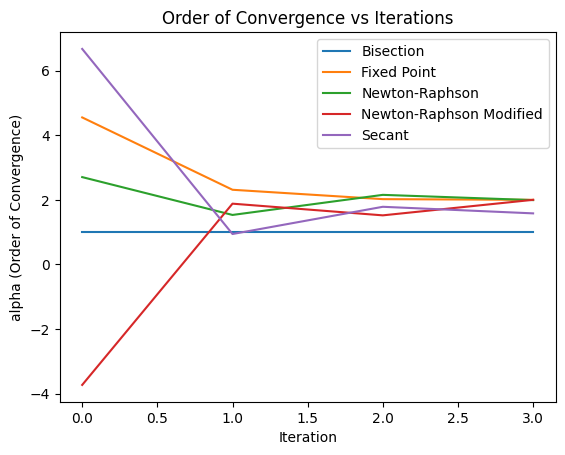

In [4]:
import matplotlib.pyplot as plt

plt.plot(ocs(bis), label="Bisection")
plt.plot(ocs(fip), label="Fixed Point")
plt.plot(ocs(n_r), label="Newton-Raphson")
plt.plot(ocs(nrm), label="Newton-Raphson Modified")
plt.plot(ocs(sec), label="Secant")

plt.title("Order of Convergence vs Iterations")
plt.xlabel("Iteration")
plt.ylabel("alpha (Order of Convergence)")
plt.legend()
plt.show()

## Asymptotic Constant

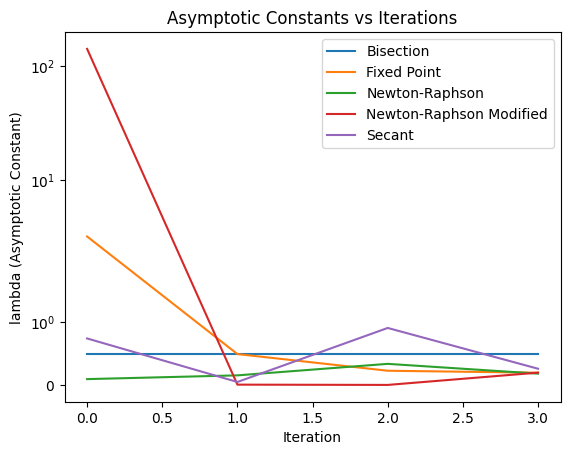

In [5]:
plt.plot(acs(bis), label="Bisection")
plt.plot(acs(fip), label="Fixed Point")
plt.plot(acs(n_r), label="Newton-Raphson")
plt.plot(acs(nrm), label="Newton-Raphson Modified")
plt.plot(acs(sec), label="Secant")

plt.title("Asymptotic Constants vs Iterations")
plt.xlabel("Iteration")
plt.ylabel("lambda (Asymptotic Constant)")
plt.yscale("symlog")
plt.legend()
plt.show()

## Error Module

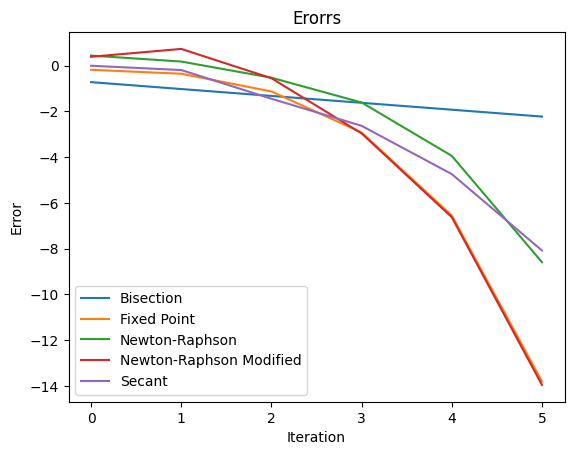

In [6]:
plt.plot(error(bis), label="Bisection")
plt.plot(error(fip), label="Fixed Point")
plt.plot(error(n_r), label="Newton-Raphson")
plt.plot(error(nrm), label="Newton-Raphson Modified")
plt.plot(error(sec), label="Secant")

plt.title("Erorrs")
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.legend()
plt.show()

# Error cases

In [7]:
import numpy as np


def log_root(table):
    root, value = table[-1][0], table[-1][1]
    print(f"found x = {root} with f(x) = {value}")


def plot(a, b, f, title):
    xs = np.linspace(a, b)
    ys = f(xs)
    plt.plot(xs, ys)
    plt.axhline(color="black",linewidth="0.7")
    plt.axvline(color="black",linewidth="0.7")
    plt.grid(True)
    plt.title(title)
    plt.show()


### Bisection

[Success]
found x = -1.41815185546875 with f(x) = -3.957298560651531e-06
[Failure]
Panic: f(x) has no sign


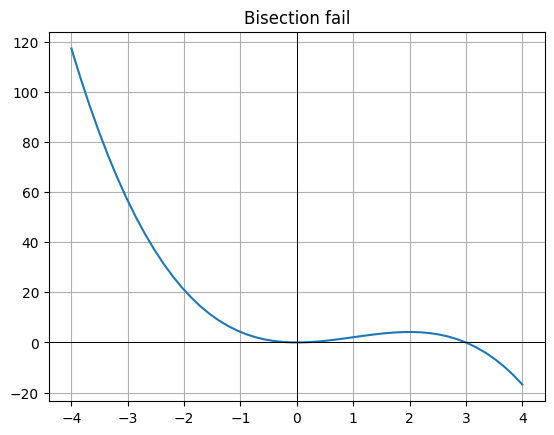

In [8]:
from math import sin, cos, exp, pi

# sacado del ej. 1 de la guia 2.
def f(x):
    return exp(x) * (sin(x) + cos(x) - 2 * x - 2)

print("[Success]")
table = bisection(f, -2.5, -0.5, 10e-5)
log_root(table)

def f(x):
    # R = 1
    return pi * x ** 2 * (3 - x) / 3

print("[Failure]")
try:
    table = bisection(f, -4, 4)
except ValueError as v:
    print(v)

# El método falla porque al calcular el centro del intervalo resulta en 0,
# donde f(0) = 0 y al comparar el cambio de signo con f(a) este se anula, por lo
# que no existe y esto se modela lanzando una excepción.

plot(-4, 4, f, "Bisection fail")

### Fixed point

[Success]
found x = 1.9337524076778332 with f(x) = -1.7913940076885737e-06
[Failure]
found x = 7999.999981810106 with f(x) = 1.7763568353612826e-12


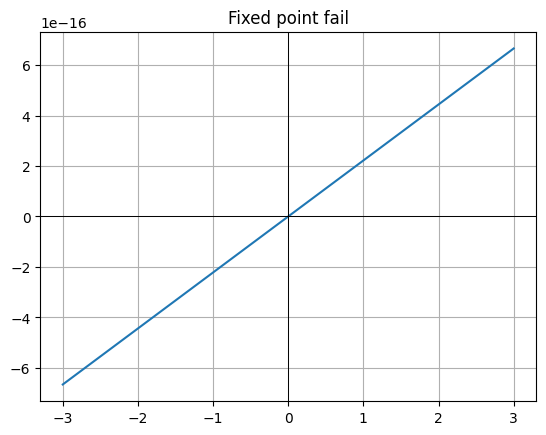

In [9]:
from math import sin
from sys import float_info

# sacado del ej. 4 de la guia 2.
def f(x):
    return x ** 2 / 4 - sin(x)

print("[Success]")
table = fixed_point(f, 1.75, 10e-6)
log_root(table)

def f(x):
    return float_info.epsilon * x

print("[Failure]")
# Se tomó el intervalo [0, 16_000]
table = fixed_point(f, 8000, max_iter=10_000_000)
log_root(table)

# Esta f tiene una única raíz en 0. Su problema es que crece muy lentamente,
# la función g(x) = x - f(x) resulta tener una derivada constante muy cercana
# a 1. Por lo que xn+1 ~= xn - f(x) y avanza muy despacio llegando a la máxima
# cantidad de iteraciones.

plot(-3, 3, f, "Fixed point fail")

### Newton-Raphson Modified

[Success]
found x = 2.0000000040807704 with f(x) = -3.552713678800501e-15
[Failure]
found x = 0.0 with f(x) = -1.0


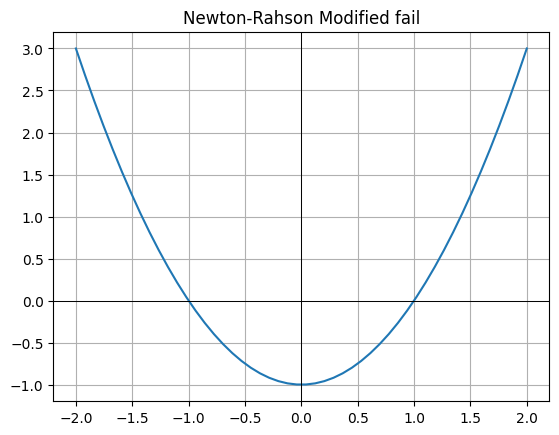

In [10]:
# sacado del ej. 12, b de la guia 2.
def f(x):
    return x ** 3 - 9 * x ** 2 + 24 * x - 20

def df(x):
    return 3 * x ** 2 - 18 * x + 24

def d2f(x):
    return 6 * x - 18

print("[Success]")
table = newton_raphson_modified(f, df, d2f, 1.5, 10e-4)
log_root(table)

def f(x):
    return x ** 2 - 1

def df(x):
    return 2 * x

def d2f(_):
    return 2

print("[Failure]")
# Se tomó el intervalo [-2, 2]
table = newton_raphson_modified(f, df, d2f, 0, 10e-5)
log_root(table)

# Elegímos una functión tal que f(0) != 0, f'(0) = 0 y f''(0) != 0 tal que
# se anule el segundo termino de g quedando que xn+1 = xn - 0. Por lo que
# el método se estanca y no progresa.

plot(-2, 2, f, "Newton-Rahson Modified fail")

### Newton-Raphson

[Success]
found x = 1.9999999642009965 with f(x) = 0.0
[Failure]
found x = 5.971758207658714 with f(x) = 0.0


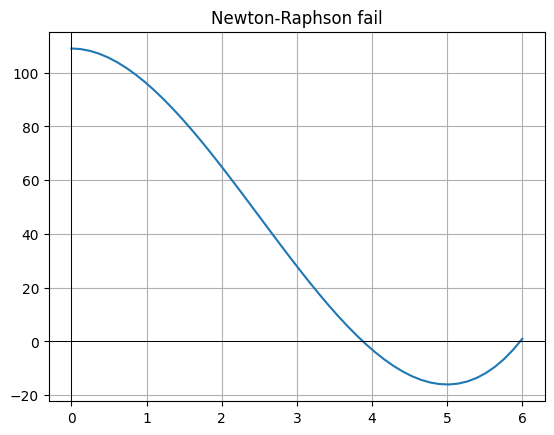

In [11]:
from sys import float_info

# sacado del ej. 12 de la guia 2.
def f(x):
    return x ** 3 - 9 * x ** 2 + 24 * x - 20

def df(x):
    return 3 * x ** 2 - 18 * x + 24

print("[Success]")
table = newton_raphson(f, df, 1.5, 0)
log_root(table)

def f(x):
    return 2 * x ** 3 - 15 * x ** 2 + 109

def df(x):
    return 6 * x ** 2 - 30 * x

print("[Failure]")
# Se eligió el intervalo (0, 5)
table = newton_raphson(f, df, float_info.epsilon)
log_root(table)

# Este es un caso de falla porque en el intervalo elegido no se anula
# la derivada y la función es continua, la raíz encontrada está fuera.

plot(0, 6, f, "Newton-Raphson fail")

### Secant

[Success]
found x = 1.933753762836575 with f(x) = 1.2629342016623468e-11
[Failure]
found x = 2.0 with f(x) = 4.0


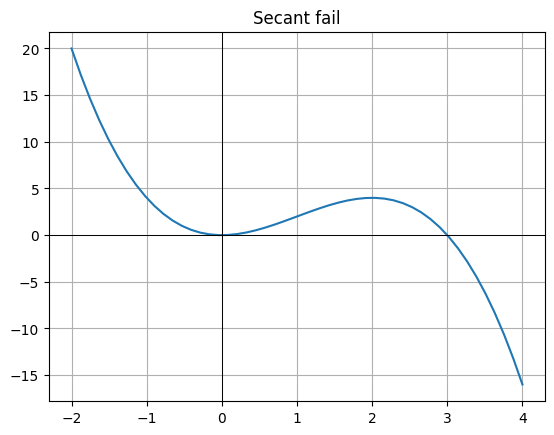

In [12]:
from math import sin
from sys import float_info

# sacado del ej. 16 de la guia 2.
def f(x):
    return x ** 2 / 4 - sin(x)

print("[Success]")
table = secant(f, 1.5, 2, 10e-6)
log_root(table)

def f(x):
    return -x ** 3 + 3 * x ** 2

print("[Failure]")
table = secant(f, -1, 2 - float_info.epsilon)
log_root(table)

# El método falla porque la secante es casi perfectamente horizontal, por
# lo que su segunda iteración queda muy lejos de donde estaba y al calcular la
# proxima aproximación a la raíz se estanca en el valor previo donde al comparar
# el error absoluto entre iteraciones da muy muy chico y termina.

plot(-2, 4, f, "Secant fail")